In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [27]:
path = pd.read_csv("D:/Study/data ml/customer-persona-project/backend/data/Mall_Customers.csv")
df = pd.DataFrame(path)

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [28]:
df.shape

(200, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df.describe().T[["mean", "std", "min", "max"]]

,mean,std,min,max
CustomerID,100.50,57.879185,1.0,200.0
Age,38.85,13.969007,18.0,70.0
Annual Income (k$),60.56,26.264721,15.0,137.0
Spending Score (1-100),50.20,25.823522,1.0,99.0


In [31]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Preprocessing

#### Encoding Gender

In [32]:

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [33]:
X = df[["Annual Income (k$)", "Spending Score (1-100)" ]]

#### Scaling Feature

In [34]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

#### Find optimal number of clusters (Elbow Method)

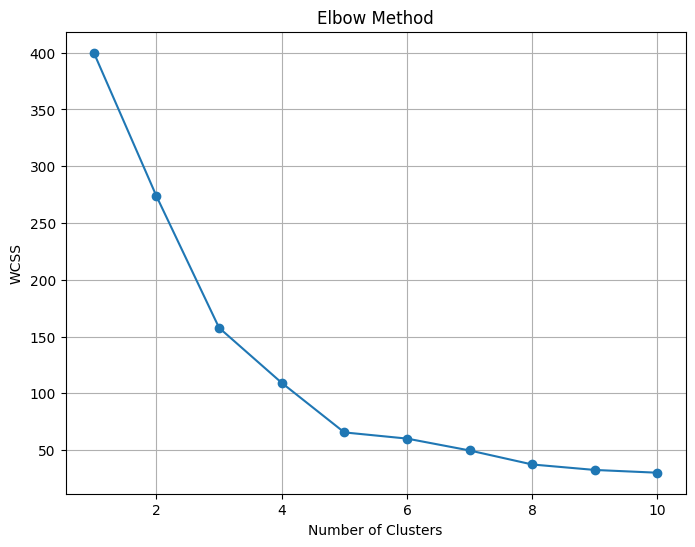

In [35]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

#### K Means

In [36]:
kmeans = KMeans(n_clusters=5, random_state=5)
df['Cluster'] = kmeans.fit_predict(X)

Visualsisasi cluster

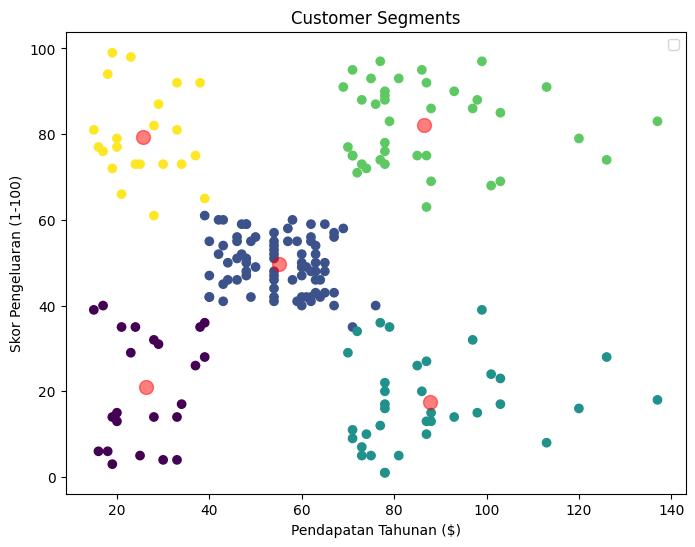

In [37]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=df['Cluster'],
    cmap='viridis'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    alpha=0.5,
    c='red',
)

plt.xlabel("Pendapatan Tahunan ($)")
plt.ylabel('Skor Pengeluaran (1-100)')
plt.title("Customer Segments")
plt.legend()
plt.show()


#### Hitung Skor Siluet (untuk k yang dipilih)

In [38]:
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Skor Siluet: {score}")

Skor Siluet: 0.5539423799434205


#### Compere dan visualisasi score perbedaan dengan k

k = 2, Silhouette Score = 0.397
k = 3, Silhouette Score = 0.467
k = 4, Silhouette Score = 0.494
k = 5, Silhouette Score = 0.555
k = 6, Silhouette Score = 0.514
k = 7, Silhouette Score = 0.502
k = 8, Silhouette Score = 0.455
k = 9, Silhouette Score = 0.457
k = 10, Silhouette Score = 0.445


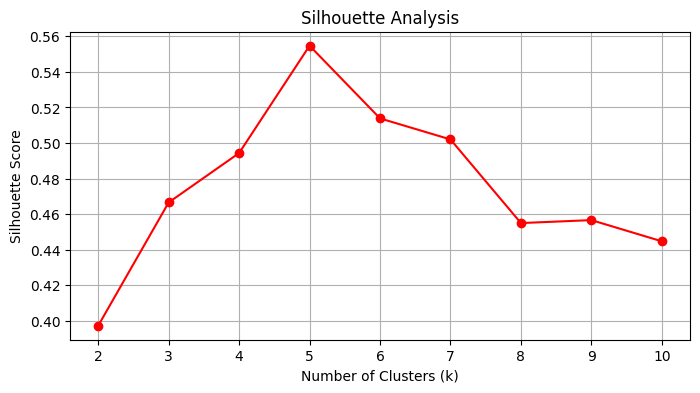

In [39]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

# visualize
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid()
plt.show()